# TALLER 5 ##

#### ALEJANDRO ALAYON ###
#### CAMILO GARCIA 201417471 ####

## Objetivos ##

- Aprender sobre segmentacion de imagenes en phyton.
- Entener el concepto de imagenes como matrices.
- Familiarizarse con el uso de watersheed y otros programas de segmentacion.
- Segmentar eficientemente las imágenes de granulometría.
- Familiarizarse con transformada de Hough para parametrizar segmentos. 

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from scipy import misc
from scipy import ndimage
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Populating the interactive namespace from numpy and matplotlib


Lo primero que hay que comprender en el procesamiento de imagenes es estas son vistas como matrices en phyton. Cualquier color puede ser representado como una combinacion de rojo, verde y azul. De ahi vienen las siglas RGB. Cada pixel de la imagen es un vector de 0 a 256 dependiendo de la proporcion de los 3 colores. 

- Ahora hablaremos de las funciones usadas. imread() es una funcion de la libreria pylab con la cual se leen imagenes de  un archivo en terminos de una matriz. Tiene 2 argumentos, uno es el nombre de la imagene en la carpeta que se trabaja. Para imagenes en escala gris retorna una matriz M*N. Para imagenes RGB retorna una matriz M*N*3 y para una imagen RGBA una matriz M*N*4.

- La siguiente funcion es color.rgb2gray() se utilizara para convertir una matriz RGB a una matriz de escala gris (de M*N*3 a M*N). Su unica entrada es la matriz a convertir.

- ndimage.median_filter() es una funcion utilizarada para aplicar un filtro a la imagen. Esta funcion puede tener varias entradas, pero en este caso solo se usa la imagen a filtrar y la magnitud del filtro.

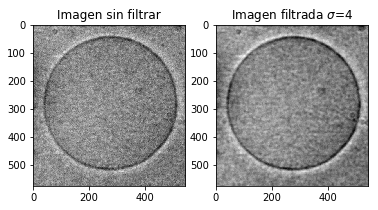

In [2]:
image_rgb = pylab.imread("ves_full_150_002.jpg")
image_gray = color.rgb2gray(image_rgb)
image_denoised = ndimage.median_filter(image_gray, 4)
plt.subplot(121)
plt.title('Imagen sin filtrar')
plt.imshow(image_gray);
pylab.gray()
plt.subplot(122)
plt.title('Imagen filtrada $\sigma$=4')
plt.imshow(image_denoised);
pylab.gray()



Se trabajara con funciones de la libreria cv2, y es necesario instalar este paquete para poder utilizarlo. La primer funcion usada es canny. El objetivo de la funcion es detectar ejes o bordes. Aun asi, es un poco compleja y hace varios pasos: Primero disminuye el ruido de la imagen de entrada, despues busca el gradiante de intensidad de la imagen (es decir, donde hay cambios muy significativos de color en la imagen). La ecuacion que utiliza la funcion para encontrar el gradiente de la imagen es igual a 

$$EdgeGradient=\sqrt{(G_x)^2+(G_y)^2}$$

Por ultimo, la funcion canny analiza todos los puntos de la matriz para definir cuales conforman la supeficie de la imagen y suprime los demas vectores. Ademas, es posible agragar valores de gradiente minimo y maximo a la funcion para que canny encuentre de manera mas eficiente los puntos que realmente son bordes y los que no. En este caso se pone un limite inferior con valor de 3.


Ahora se mejorara la deteccion de bordes por medio de la transformada de Hough (segundo metodo). De forma breve la transformada de Hough busca encontrar puntos en una imagen que satisfagan una ecuacion (puede ser una recta o un circulo) pero esta ecuacion estara en forma polar o parametrizada y por lo tanto hay que realizar una transformacion entre las coordenadas de origen (x,y) y las coordenadas parametrizadas (p y alfa). Los puntos que cumplan con la ecuacion son agrupados.
La ecuacion parametrica para un circulo es igual a:

$$(x-a)^2+(y-b)^2=r^2$$

En terminos de codigo, la funcion hough_circle realiza una transformada de hough circular. Esta transformada tiene como entrada una matriz imagen (debe tener valores diferentes de cero en sus bordes) y el radio del circulo para la ecuacion parametrica. 

Por ultimo, se usa la funcion hough_circle_peaks para encontrar los picos o puntos que mejor se ajustan a la transformada. El resto del codigo es un for para plotear el ciruclo encontrado por la transoformada y tambien para encontrar el centroide del circulo.

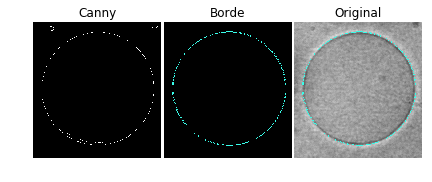

In [3]:
edges = canny(image_denoised, sigma=3)

hough_radii = np.arange(240,250,260)
hough_res = hough_circle(edges,hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
im = np.zeros((576, 544))
im = color.gray2rgb(im)
fig, ax = plt.subplots(ncols=1, nrows=1)
image_denoised = color.gray2rgb(image_denoised)
centroy=[]
centrox=[]
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    centroy.append(center_y)
    centrox.append(center_x)
    image_denoised[circy, circx] = (200, 3, 23)
    im[circy, circx] = (200, 3, 23)

plt.subplot(131)
plt.title('Canny')
plt.imshow(edges);
plt.axis('off')
plt.subplot(132)
plt.title('Borde')
plt.imshow(im);
plt.axis('off')
plt.subplot(133)
plt.title('Original')
plt.imshow(image_denoised);
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

In [4]:
print("El centroide del cilrculo tiene las cordenadas x,y de (", mean(centrox),",", np.round(mean(centroy),1),")" )

El centroide del cilrculo tiene las cordenadas x,y de ( 277.0 , 281.7 )


## Watershed ##

Para esta seccion se utilizara la funcion watershed para identificar granos en una imagen. Se realizo todo el procedimiento principal pero no se tuvo exito, se cree que fue debido a la imagen y la dificultad de diferenciar los bordes de grano. En la siguiente seccion se realiza el mismo procedimiento explicado para otra imagen.

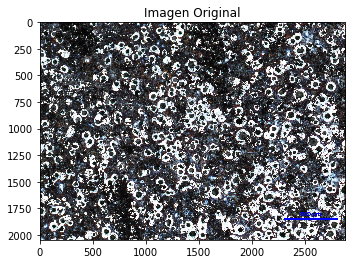

In [135]:
import cv2
gran = cv2.imread("FeNod_50X_L.tif")
#print imagen
pylab.imshow(gran, cmap = cm.Greys_r);
plt.title('Imagen Original', fontsize=12);

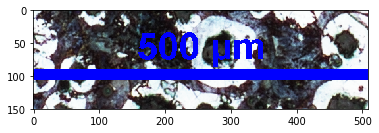

In [136]:
lenmin=2295
lenmax=2804
crop_face = gran[1750:1900,lenmin:lenmax, :]
plt.imshow(crop_face)
pxlsz=(lenmax-lenmin)/500 #Tamaño en micras de cada pixel

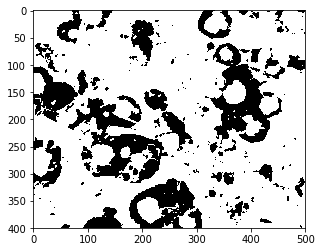

In [137]:
import cv2

gray = cv2.cvtColor(gran,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
crop = thresh[1500:1900,0:500]
plt.imshow(crop)

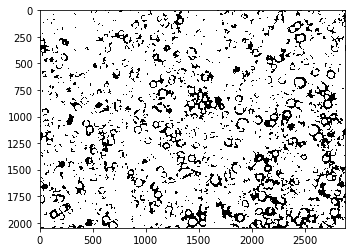

In [138]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_bg)

In [139]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

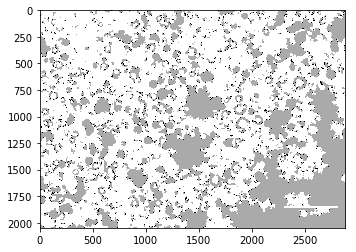

In [140]:
markers = cv2.watershed(gran,markers)
gran[markers == -1] = [255,0,0]
plt.imshow(markers)

## WaterShed ##

En esta seccion se buscara definir los bordes de grano de una imagen de granulometria por medio de otra funcion llamada watershed(). Se inicia leyendo la imagen con imread() y filtrandola para disminuir el ruido de la image.

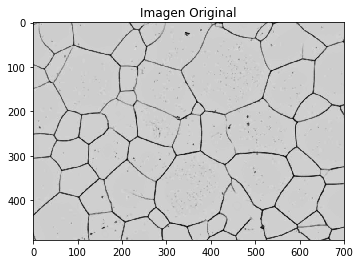

In [192]:
gran1 = cv2.imread('granitos.jpg')
#print imagen
gran2 = gran1[0:490,0:700]
gran2 = ndimage.median_filter(gran2, 3)
pylab.imshow(gran2, cmap = cm.Greys_r);
plt.title('Imagen Original', fontsize=12);

En esta seccion se utiliza la funcion cvtColor() para convertir una imagen de color a gis. La entrada de la funcion es una imagen y cv2.COLOR_BGR2GRAY. 

Por otro lado threshold se usa para convertir la imagen gris a blanco y negro. La primer entrada es una imagen gris,la segunda un valor asignado para el cual todo valor mayor a este sera convertido en la tercer entrada. La cuarta entrada invierte los valores, es decir lo blanco se vuelve negro y viceversa.

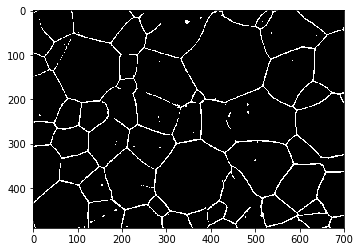

In [193]:
gray = cv2.cvtColor(gran2,cv2.COLOR_BGR2GRAY)
ret2, thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh2)

En este paso se perfeciona la imagen. Debido a que pueden haber ciertas regiones que sean o no bordes de grano es necesario remover el ruido, es necesario identificar las regiones que de seguro son fronteras, las que seguro no son frontera y por ultimo encontrar las regiones donde no es muy claro para que la funcion watershed pueda decidir que definir como borde o no. Se plotea al final de seccion los pixeles donde no es muy claro si existe o no un borde, debido a que la imagen esta bien definida, son pocos los puntos que estan en incertidumbre.

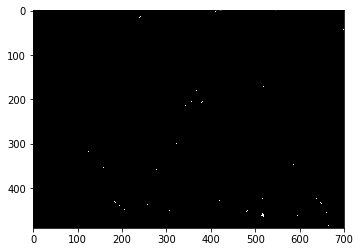

In [194]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh2,cv2.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=100)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_fg)

Como ya se tienen los pixeles o componentes de la matriz conocidos (sin importar si son bordes o parte del fonde de la imagen), se crea un ultimo array con las regiones conocidas (estas tendran un numero positivo diferente a uno) y todo lo que no se sabe si es frontera o no tendra el valor de 0. Por ultimo, se aplica la funcion watershed (tiene 2 entradas, la imagen inicial y la matris de regiones marcadas) la cual definira los bordes de las regiones desconocidas. La funcion a veces no identifica ciertas fronteras, sin embargo el resultado es satisfactorio para la imagen. Se puede ver la separacion de la mayoria de granos de manera correcta.

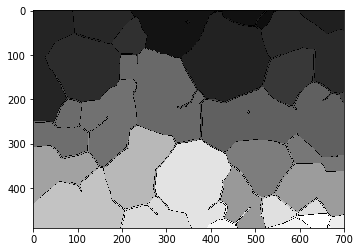

In [195]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(gran2,markers)
gran2[markers == -1] = [255,0,0]

plt.imshow(markers)

## Conclusiones ##

- Phyton es un ambiente relativamente util para el procesamiento de imagenes. Se usaron principalmente 2 metodos, la transformada de Hough y la funcion Watershed.

- Toda imagen puede ser representada como una matriz (combinacion de rojo, verde y azul).

- El exito de la segmentacion de una imagen tambien depende de la calidad de la imagen, y es probablemente la razon por la cual en el primer intento no funciono la funcion Watershed.

- El resultado de la funcion watershed no es del todo perfecto debido a que hay algunas regiones de borde que son dificiles de identificar, aun asi los resultados son bastantes buenos.

- Para imagenes con bordes mas definidos la funcion es bastante util y poderosa.

- Se recomienda para proximos trabajos explorar la funcion kmeans, la cual sirve tambien para segmentacion de imagenes. En este taller se exploro un poco pero no se alcanzo a llegar a un resultado final.